In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
#绘图参数
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params) # 设置 matplotlib 的各种参数
plt.style.use('seaborn-whitegrid') # seaborn 主题
sns.set_style("white")
plt.rc('font', **{'family': 'Microsoft YaHei, SimHei'})  # 设置中文字体的支持
# sns.set(font='SimHei')  # 解决Seaborn中文显示问题，但会自动添加背景灰色网格
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

import scipy.stats as stats # 统计学库
from scipy.stats import norm  # 用于拟合正态分布曲线

#绘制正态分布曲线
def norm_comparision_plot(data, figsize=(12, 10), color="#099DD9",
                          ax=None, surround=True, grid=True):
    plt.figure(figsize=figsize) # 设置图片大小
    # fit=norm: 同等条件下的正态曲线(默认黑色线)；lw-line width 线宽
    sns.distplot(data, fit=norm, color=color, \
                 kde_kws={"color" :color, "lw" :3 }, ax=ax)
    (mu, sigma) = norm.fit(data)  # 求同等条件下正态分布的 mu 和 sigma
    # 添加图例：使用格式化输入，loc='best' 表示自动将图例放到最合适的位置
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'. \
               format(mu, sigma)] ,loc='best')
    plt.ylabel('Frequency')
    plt.title("Distribution")
    if surround == True:
        sns.despine(trim=True, left=True, offset=10)
    if grid == True:
        plt.grid(True)  # 添加网格线


# 数据概况

In [86]:
# 读取数据集
df=pd.read_excel(r'C:\Users\supermarket_data.xlsx')
# 显示前5行数据
df.head() 

,客户名称,付款日期,国家/地区 (Country),地区,类别,销售额,数量
0,Aaron Bergman,2014-11-11,美国,美国中部,技术,221.980,1
1,Justin Ritter,2014-02-05,澳大利亚,大洋洲,家具,3709.395,1
2,Craig Reiter,2014-10-17,澳大利亚,大洋洲,技术,5175.171,1
3,Katherine Murray,2014-01-28,德国,西欧,技术,2892.510,1
4,Rick Hansen,2014-11-05,塞内加尔,西非,技术,2832.960,1


In [87]:
# 查看数据类型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45693 entries, 0 to 45692
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   客户名称             45693 non-null  object        
 1   付款日期             45693 non-null  datetime64[ns]
 2   国家/地区 (Country)  45693 non-null  object        
 3   地区               45693 non-null  object        
 4   类别               45693 non-null  object        
 5   销售额              45693 non-null  float64       
 6   数量               45693 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 2.4+ MB


# RFM值构造

# 创建R值

In [88]:
# 选取客户最近一次消费时间
r= df.groupby('客户名称')['付款日期'].max().reset_index()
# r.head()
r

,客户名称,付款日期
0,Aaron Bergman,2015-09-09
1,Aaron Hawkins,2015-12-19
2,Aaron Smayling,2015-09-15
3,Adam Bellavance,2015-09-17
4,Adam Hart,2015-09-26
...,...,...
791,Xylona Preis,2015-11-18
792,Yana Sorensen,2015-12-27
793,Yoseph Carroll,2015-11-18
794,Zuschuss Carroll,2015-09-12


In [89]:
# 计算最近一次付款时间截止到2015年12月31日间隔天数
r['R']=(pd.to_datetime('2015-12-31')-r['付款日期']).dt.days
r = r[['客户名称','R']]
r

,客户名称,R
0,Aaron Bergman,113
1,Aaron Hawkins,12
2,Aaron Smayling,107
3,Adam Bellavance,105
4,Adam Hart,96
...,...,...
791,Xylona Preis,43
792,Yana Sorensen,4
793,Yoseph Carroll,43
794,Zuschuss Carroll,110


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


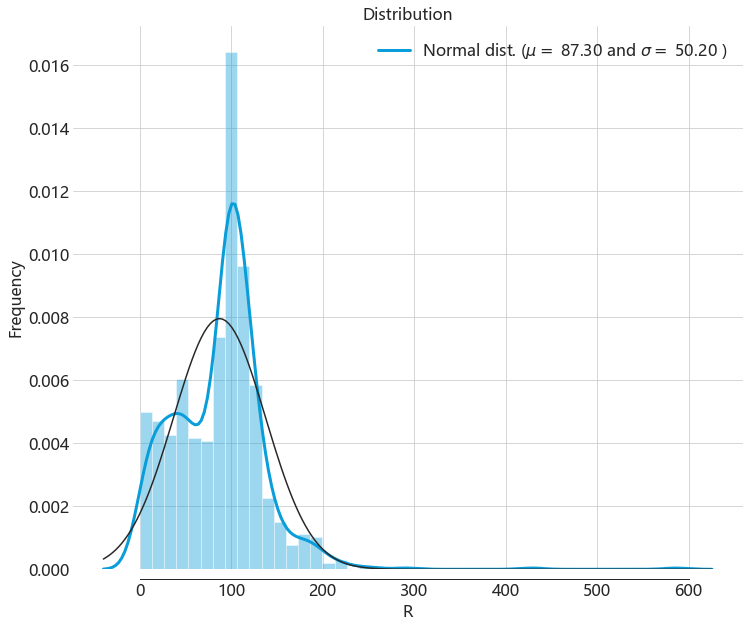

In [90]:
#绘制R的正态分布图
norm_comparision_plot(data=r['R'])

# 创建F值

In [91]:
df['辅助列'] = df['付款日期']
# 设置一个辅助列，对同一天支付日期只算一次
dup_f = df.groupby(['客户名称','付款日期'])['辅助列'].count().reset_index()
f = df.groupby('客户名称')['付款日期'].count().reset_index()
f.columns = ['客户名称','F']
f

,客户名称,F
0,Aaron Bergman,87
1,Aaron Hawkins,55
2,Aaron Smayling,53
3,Adam Bellavance,55
4,Adam Hart,64
...,...,...
791,Xylona Preis,56
792,Yana Sorensen,61
793,Yoseph Carroll,51
794,Zuschuss Carroll,75


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


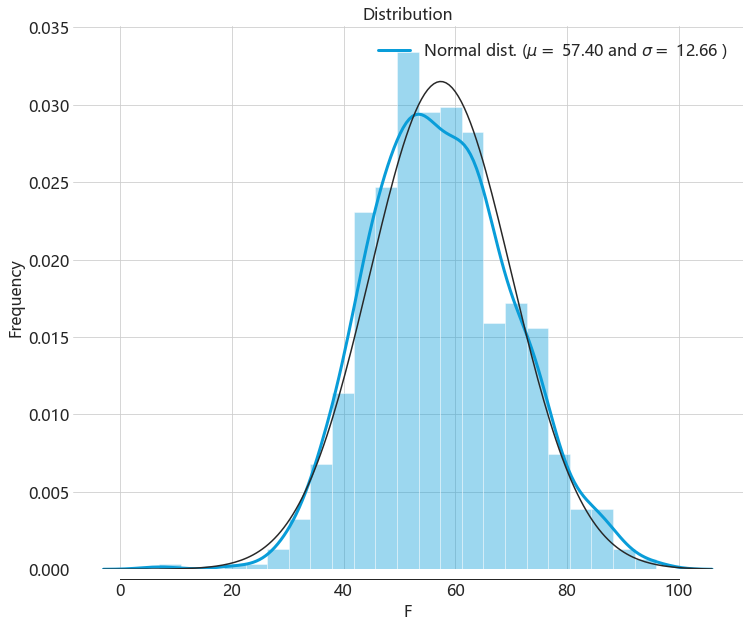

In [92]:
#绘制F的正态分布图
norm_comparision_plot(data=f['F'])

# 创建M值

In [37]:
m = df.groupby('客户名称')['销售额'].sum().reset_index()
m.columns=['客户名称','总支付金额']
fm = pd.merge(m,f,left_on = '客户名称',right_on = '客户名称',how = 'inner')
fm['M'] = fm['总支付金额']/fm['F']
fm = fm[['客户名称','F','M']]
fm

,客户名称,F,M
0,Aaron Bergman,87,274.515259
1,Aaron Hawkins,55,348.524615
2,Aaron Smayling,53,193.015834
3,Adam Bellavance,55,281.993389
4,Adam Hart,64,259.273085
...,...,...,...
791,Xylona Preis,56,210.724618
792,Yana Sorensen,61,312.006852
793,Yoseph Carroll,51,363.586267
794,Zuschuss Carroll,75,342.939977


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


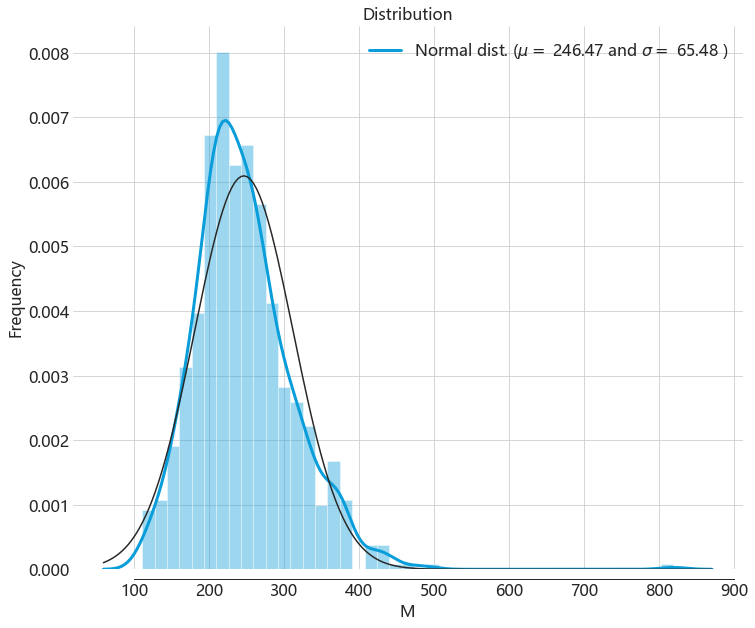

In [93]:
#绘制M的正态分布图
norm_comparision_plot(data=fm['M'])

In [95]:
rfm = pd.merge(r,fm,left_on = '客户名称',right_on = '客户名称',how = 'inner')
rfm

,客户名称,R,F,M
0,Aaron Bergman,113,87,274.515259
1,Aaron Hawkins,12,55,348.524615
2,Aaron Smayling,107,53,193.015834
3,Adam Bellavance,105,55,281.993389
4,Adam Hart,96,64,259.273085
...,...,...,...,...
791,Xylona Preis,43,56,210.724618
792,Yana Sorensen,4,61,312.006852
793,Yoseph Carroll,43,51,363.586267
794,Zuschuss Carroll,110,75,342.939977


# 打分

In [96]:
rfm['R-SCORE'] = pd.cut(rfm['R'],bins = [0,30,60,90,120,float('inf')],labels = [5,4,3,2,1],right = False).astype(float)
rfm['F-SCORE'] = pd.cut(rfm['F'],bins = [0,23,40,57,74,float('inf')],labels = [1,2,3,4,5],right = False).astype(float)
rfm['M-SCORE'] = pd.cut(rfm['M'],bins = [0,180,240,300,360,float('inf')],labels = [1,2,3,4,5],right = False).astype(float)
rfm

,客户名称,R,F,M,R-SCORE,F-SCORE,M-SCORE
0,Aaron Bergman,113,87,274.515259,2.0,5.0,3.0
1,Aaron Hawkins,12,55,348.524615,5.0,3.0,4.0
2,Aaron Smayling,107,53,193.015834,2.0,3.0,2.0
3,Adam Bellavance,105,55,281.993389,2.0,3.0,3.0
4,Adam Hart,96,64,259.273085,2.0,4.0,3.0
...,...,...,...,...,...,...,...
791,Xylona Preis,43,56,210.724618,4.0,3.0,2.0
792,Yana Sorensen,4,61,312.006852,5.0,4.0,4.0
793,Yoseph Carroll,43,51,363.586267,4.0,3.0,5.0
794,Zuschuss Carroll,110,75,342.939977,2.0,5.0,4.0


In [97]:
rfm['R是否大于均值'] = (rfm['R-SCORE'] > rfm['R-SCORE'].mean()) * 1
rfm['F是否大于均值'] = (rfm['F-SCORE'] > rfm['F-SCORE'].mean()) * 1
rfm['M是否大于均值'] = (rfm['M-SCORE'] > rfm['M-SCORE'].mean()) * 1
rfm.head()

,客户名称,R,F,M,R-SCORE,F-SCORE,M-SCORE,R是否大于均值,F是否大于均值,M是否大于均值
0,Aaron Bergman,113,87,274.515259,2.0,5.0,3.0,0,1,1
1,Aaron Hawkins,12,55,348.524615,5.0,3.0,4.0,1,0,1
2,Aaron Smayling,107,53,193.015834,2.0,3.0,2.0,0,0,0
3,Adam Bellavance,105,55,281.993389,2.0,3.0,3.0,0,0,1
4,Adam Hart,96,64,259.273085,2.0,4.0,3.0,0,1,1


# 用户分层

In [98]:
rfm['标签'] = (rfm['R是否大于均值'] * 100) + (rfm['F是否大于均值'] * 10) + (rfm['M是否大于均值'] * 1)
rfm.head()

,客户名称,R,F,M,R-SCORE,F-SCORE,M-SCORE,R是否大于均值,F是否大于均值,M是否大于均值,标签
0,Aaron Bergman,113,87,274.515259,2.0,5.0,3.0,0,1,1,11
1,Aaron Hawkins,12,55,348.524615,5.0,3.0,4.0,1,0,1,101
2,Aaron Smayling,107,53,193.015834,2.0,3.0,2.0,0,0,0,0
3,Adam Bellavance,105,55,281.993389,2.0,3.0,3.0,0,0,1,1
4,Adam Hart,96,64,259.273085,2.0,4.0,3.0,0,1,1,11


In [99]:
def transform_label(x):
    if x == 111:
        label = '重要价值客户'
    elif x == 110:
        label = '一般价值客户'
    elif x == 101:
        label = '重要发展客户'
    elif x == 100:
        label = '一般发展客户'
    elif x == 11:
        label = '重要保持客户'
    elif x == 10:
        label = '一般保持客户'
    elif x == 1:
        label = '重要挽留客户'
    elif x == 0:
        label = '一般挽留客户'
    return label

In [100]:
rfm['客户类型'] = rfm['标签'].apply(transform_label)
rfm.head()

,客户名称,R,F,M,R-SCORE,F-SCORE,M-SCORE,R是否大于均值,F是否大于均值,M是否大于均值,标签,客户类型
0,Aaron Bergman,113,87,274.515259,2.0,5.0,3.0,0,1,1,11,重要保持客户
1,Aaron Hawkins,12,55,348.524615,5.0,3.0,4.0,1,0,1,101,重要发展客户
2,Aaron Smayling,107,53,193.015834,2.0,3.0,2.0,0,0,0,0,一般挽留客户
3,Adam Bellavance,105,55,281.993389,2.0,3.0,3.0,0,0,1,1,重要挽留客户
4,Adam Hart,96,64,259.273085,2.0,4.0,3.0,0,1,1,11,重要保持客户


In [101]:
count = rfm['客户类型'].value_counts().reset_index()
count.columns = ['客户类型','人数']
count['占比'] = round(count['人数'] / count['人数'].sum(),2)
count

,客户类型,人数,占比
0,一般挽留客户,139,0.17
1,重要保持客户,119,0.15
2,重要挽留客户,110,0.14
3,一般保持客户,104,0.13
4,一般价值客户,86,0.11
5,重要价值客户,86,0.11
6,重要发展客户,77,0.10
7,一般发展客户,75,0.09


<function matplotlib.pyplot.text(x, y, s, fontdict=None, **kwargs)>

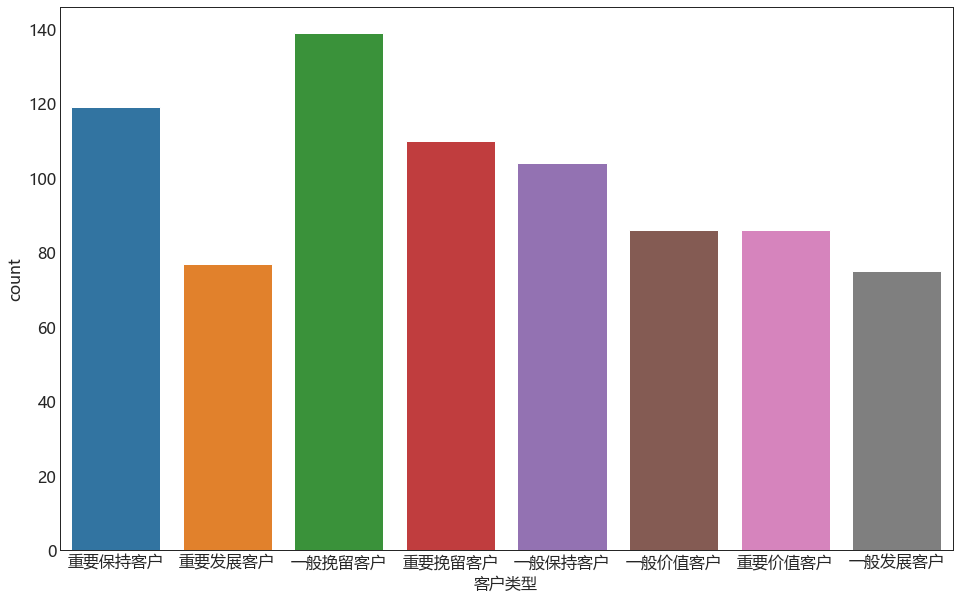

In [108]:
#绘制客户类型柱状图
sns.countplot(data=rfm,x="客户类型")